In [7]:
from data_processing_functions import *
from time import time

In [8]:
objects_to_test = ["AngleTubes","Ears","Conrods","Gameboys"]
validation_measures = ["f1","precision","recall","accuracy"]
csv_path = "/home/jens/masterData/AlgorithmTuner/lr_new_AlgorithmTunerData-data.csv"
df = pd.read_csv(csv_path, usecols = ["algName","objName","geName","tp","tn","fp","fn","cost"]+validation_measures, dtype = {"algName":"category","objName":"category","geName":"category"})
df = df[df["objName"].isin(objects_to_test)]
df["objName"].cat.remove_unused_categories(inplace=True)

df =  df.groupby(["algName","objName"]).sum().reset_index()
df["precision"]=df["tp"]/(df["tp"]+df["fp"])
df["recall"]=df["tp"]/(df["tp"]+df["fn"])
df["f1"]=2*df["tp"]/(2*df["tp"]+df["fn"]+df["fp"])
df["accuracy"]=(df["tp"]+df["tn"])/(df["tp"]+df["tn"]+df["fp"]+df["fn"])
df[["precision","recall","f1","accuracy"]].fillna(0,inplace=True)
df

/home/jens/.virtualenvs/master/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/jens/.virtualenvs/master/lib/python3.8/site-packages/pandas/core/frame.py:4459: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,algName,objName,tp,tn,fp,fn,precision,recall,accuracy,f1,cost
0,GA,AngleTubes,344,69,142,5,0.707819,0.985673,0.737500,0.823952,-6.218832
1,GA,Conrods,198,207,48,27,0.804878,0.880000,0.843750,0.840764,-7.302896
2,GA,Ears,61,157,29,10,0.677778,0.859155,0.848249,0.757764,-5.268098
3,GA,Gameboys,54,96,27,14,0.666667,0.794118,0.785340,0.724832,-4.200511


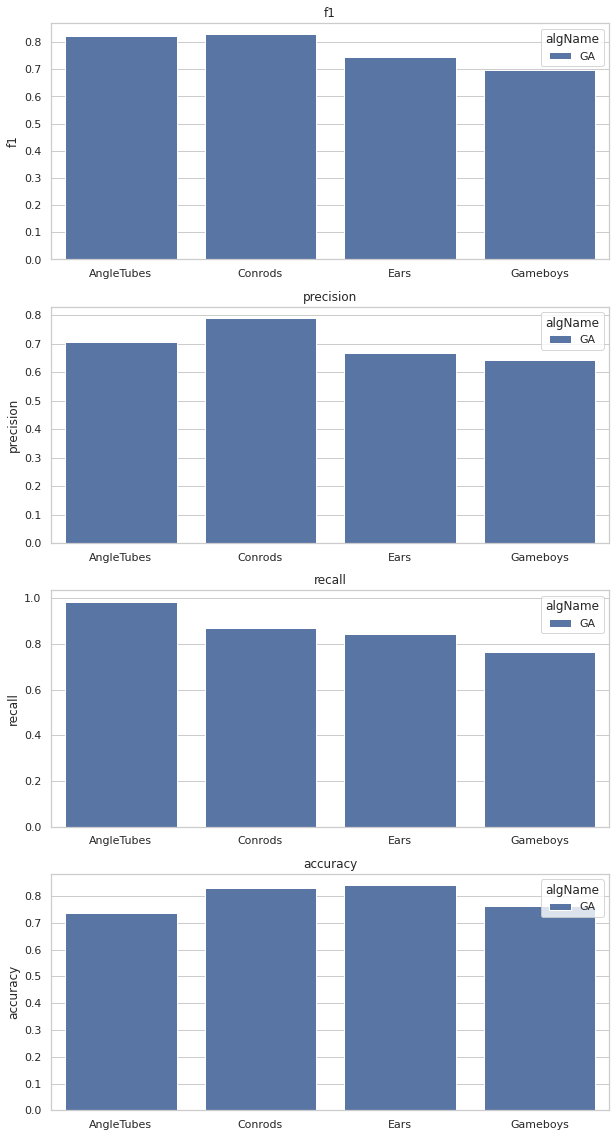

In [6]:

fig,axes = plt.subplots(len(validation_measures),1,figsize=(10,len(validation_measures)*5),sharey="row")
sns.set_theme(style="whitegrid")
for ax,vm in zip(axes,validation_measures):
    sns.barplot(x="objName",y=vm,hue="algName",data=df,ax=ax)
    ax.set_title(vm)
    ax.set_xlabel("")

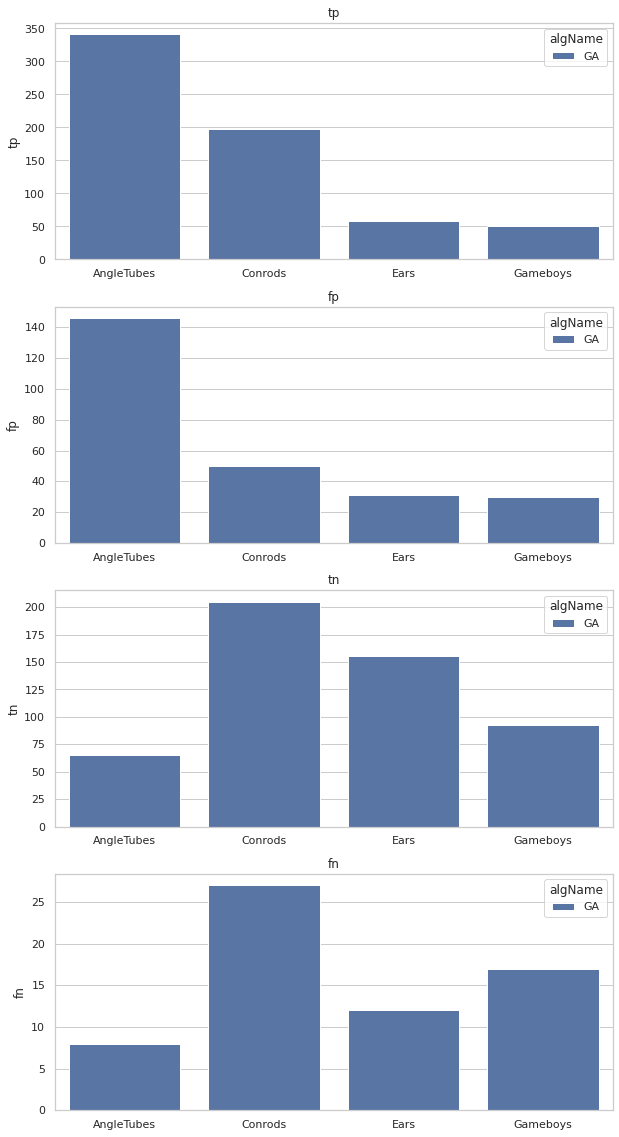

In [4]:

fig,axes = plt.subplots(len(validation_measures),1,figsize=(10,len(validation_measures)*5),sharey="row")
sns.set_theme(style="whitegrid")
for ax,vm in zip(axes,["tp","fp","tn","fn"]):
    sns.barplot(x="objName",y=vm,hue="algName",data=df,ax=ax)
    ax.set_title(vm)
    ax.set_xlabel("")
